In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.W1 = tf.keras.layers.Dense(1)
        self.build((None,1))
    
    def call(self, x):
        return self.W1(x)

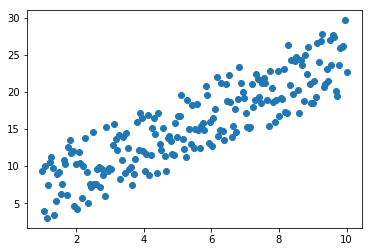

In [27]:
x = np.linspace(1,10, 200)
y_hat = x * 2 + np.random.rand(200)*10
plt.plot(x, y_hat, 'o')

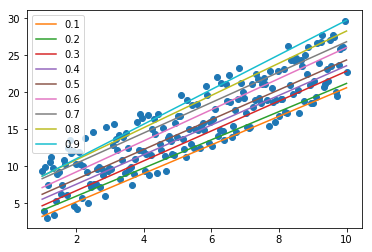

In [33]:
optimizer = tf.optimizers.Adam(1e-1)
plt.plot(x, y_hat, 'o')
for tau in np.linspace(0.1,0.9,9):
    nn = Model()
    for i in range(100):
        with tf.GradientTape() as tape:
            y = tf.squeeze(nn(x[:,None]))
            L = tf.abs(y-y_hat)
            L = tf.where( y_hat<y, (1-tau)*L, tau*L )
            loss = tf.reduce_sum(L)
        # calc + update gradients
        nn_vars = nn.trainable_variables
        grads = tape.gradient(loss, nn_vars)
        optimizer.apply_gradients(zip(grads, nn_vars))
    y = tf.squeeze(nn(x[:,None]))
    plt.plot(x, y, label=str(tau)[:3])
plt.legend()

# Single Model

In [40]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.W1 = tf.keras.layers.Dense(9)
        self.build((None,1))
    
    def call(self, x):
        return self.W1(x)

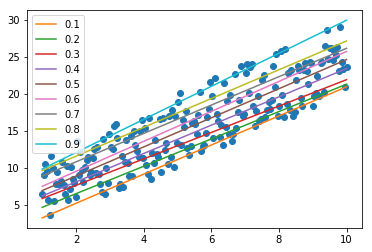

In [66]:
x = np.linspace(1,10, 200)
y_hat = x * 2 + np.random.rand(200)*10
optimizer = tf.optimizers.Adam(1e-1)
plt.plot(x, y_hat, 'o')
tau = np.linspace(0.1,0.9,9)
y_hat = y_hat[:,None] # [b,1]
tau = tau[None,:] # [1,9]
nn = Model()
for i in range(500):
    with tf.GradientTape() as tape:
        y = nn(x[:,None]) # [b,9]
        L = tf.abs(y-y_hat) # [b,9]
        error = y_hat-y
        L = tf.where(y_hat<y, (1-tau)*L, tau*L) # [b,9]
        each_loss = tf.reduce_mean(L, axis=-1) # [b]
        loss = tf.reduce_sum(each_loss) # avg of all examples
    # calc + update gradients
    nn_vars = nn.trainable_variables
    grads = tape.gradient(loss, nn_vars)
    optimizer.apply_gradients(zip(grads, nn_vars))
y = nn(x[:,None])
for i in range(9):
    plt.plot(x, y[:,i], label=str(tau[0,i])[:3])
plt.legend()

" as x becomes larger quantiles (y axis) becomes higher, but distribution doesn't change "

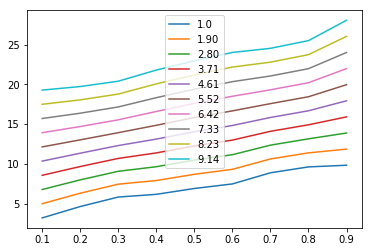

In [67]:
for i in range(0,200,20):
    plt.plot(np.squeeze(tau), y[i,:], label=str(x[i])[:4])
plt.legend()
''' as x becomes larger quantiles (y axis) becomes higher, but distribution doesn't change '''

# Same experiment w/ different x,y

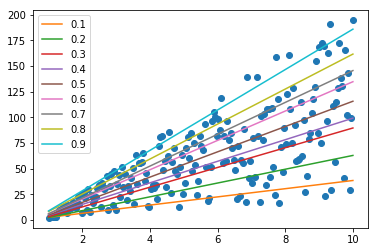

In [72]:
x = np.linspace(1,10, 200)
y_hat = x * 2 + np.random.rand(200)*10*np.arange(200)/10
optimizer = tf.optimizers.Adam(5e-1)
plt.plot(x, y_hat, 'o')
tau = np.linspace(0.1,0.9,9)
y_hat = y_hat[:,None] # [b,1]
tau = tau[None,:] # [1,9]
nn = Model()
for i in range(500):
    with tf.GradientTape() as tape:
        y = nn(x[:,None]) # [b,9]
        L = tf.abs(y-y_hat) # [b,9]
        error = y_hat-y
        L = tf.where(y_hat<y, (1-tau)*L, tau*L) # [b,9]
        each_loss = tf.reduce_mean(L, axis=-1) # [b]
        loss = tf.reduce_sum(each_loss) # avg of all examples
    # calc + update gradients
    nn_vars = nn.trainable_variables
    grads = tape.gradient(loss, nn_vars)
    optimizer.apply_gradients(zip(grads, nn_vars))
y = nn(x[:,None])
for i in range(9):
    plt.plot(x, y[:,i], label=str(tau[0,i])[:3])
plt.legend()

" as x becomes larger quantiles (y axis) becomes higher, but distribution doesn't change "

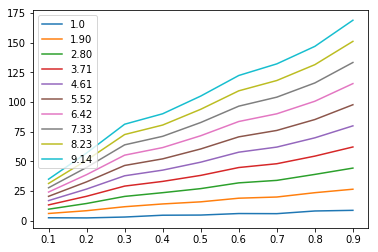

In [73]:
for i in range(0,200,20):
    plt.plot(np.squeeze(tau), y[i,:], label=str(x[i])[:4])
plt.legend()
''' here as x becomes larger distribution does change '''